# Final Project : Analysis of Pollution in India [Kaggle Dataset]

### Aim of this project is analyse dataset of pollution and answer some of the questions.

Since industrialization, there has been an increasing concern about the environmental pollution. Air pollution is the world's largest environment risk and a WHO report links 7 premature million deaths to air pollution. Many cities in India are coming in the list of most polluted places in the world and some of them are considered deadliest. Among the pollutants, SO2 is considered as a by-product of energy and industrial production and is closely linked to prosperity.
Beside taking necessary steps to combate pollution, Developing nations also have to bring people out of poverty and that makes the situation worse. 

Using this dataset, one can explore India's air pollution levels at a more granular scale.

## Questions

Q1. Is pollution getting worse? i.e. Is concentration of pollutants like so2, no2, pm 2.5 increasing every year.There is a inter-relationship between pollutants, for example, SO2 and NOx can react in the Earth’s atmosphere to form particulate matter (PM) compounds thereby increasing the concentration of pm 2.5 and reducing that of SO2 and NOx.

Q2. Find the States in india which have the highest concentration of pollutants.

Q3. How pollutants varies with seasons?

Q4. What is the difference in pollution levels between the Industrial and and non Industrial zones?


### Data set is downloaded from kaggle, link:
API link: kaggle datasets download -d shrutibhargava94/india-air-quality-data
https://www.kaggle.com/shrutibhargava94/india-air-quality-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv', encoding = "ISO-8859-1", low_memory=False)
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


Lots of values of pm2.5 are absent in the dataset

In [3]:
data.dropna(subset=['date'], inplace=True)

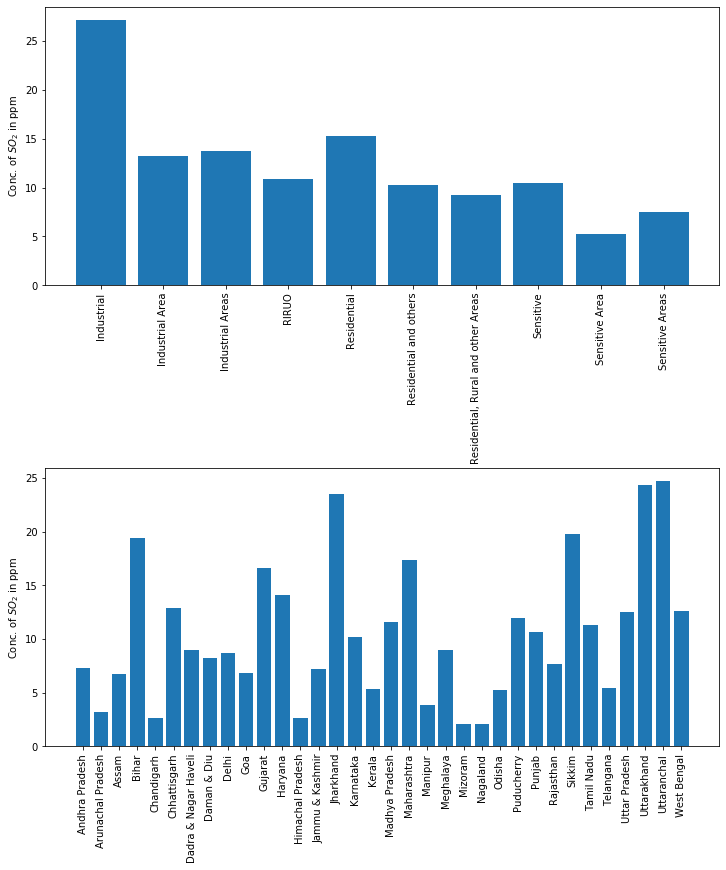

In [4]:
x = data.groupby(['type']).describe()['so2']['mean'].index
x_state = data.groupby(['state']).describe()['so2']['mean'].index

plt.figure(figsize=(10, 12))
plt.subplot(211)
plt.bar(x, data.groupby(['type']).describe()['so2']['mean'])
plt.xticks(rotation='vertical')
plt.ylabel(r'Conc. of $SO_2$ in ppm')

plt.subplot(212)
plt.bar(x_state, data.groupby(['state']).describe()['so2']['mean'])

plt.xticks(rotation='vertical')
plt.ylabel(r'Conc. of $SO_2$ in ppm')
plt.tight_layout(pad=0.4, w_pad=0.5)
plt.show()

Above plots shows the avg concentration of SO2 with type of areas and states. From the plots, we see that concentration of $SO_2$ is highest in industrial areas, around 25ppm and in residential areas, it is between 10 to 15 ppm. If we divide areas w.r.t. states, Uttarakhand, Uttaranchal, Jharkhand SO2 concentration hovers around 23 to 24 ppm(highest among states).  

Lowest SO2 conc. is around 3ppm in Mizoram and Nagaland. 

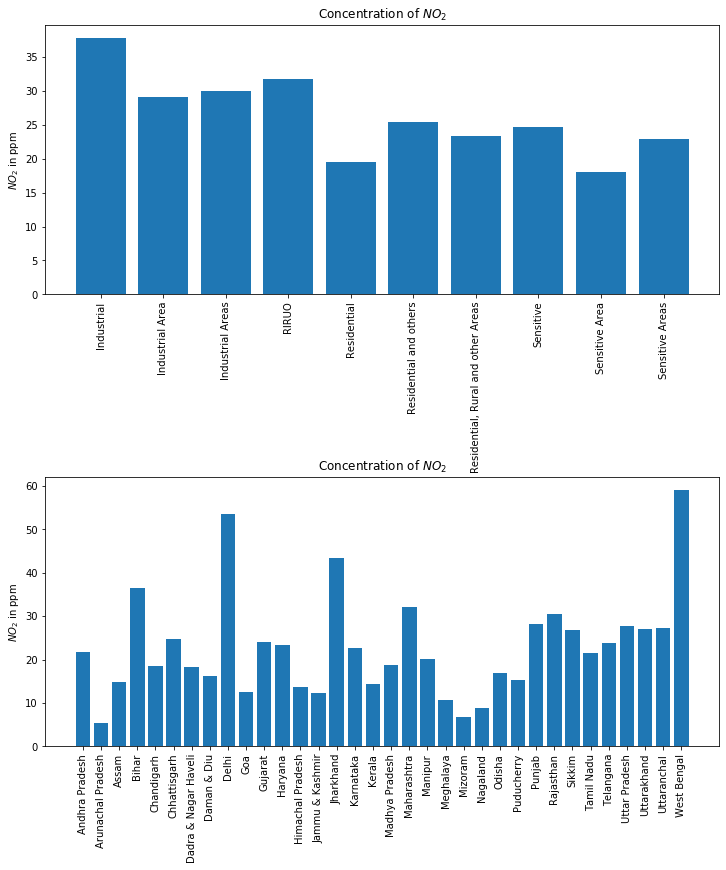

In [5]:
x = data.groupby(['type']).describe()['no2']['mean'].index
x_state = data.groupby(['state']).describe()['no2']['mean'].index

plt.figure(figsize=(10, 12))
plt.subplot(211)
plt.bar(x, data.groupby(['type']).describe()['no2']['mean'])
plt.xticks(rotation='vertical')
plt.ylabel(r'$NO_2$ in ppm')
plt.title('Concentration of $NO_2$')

plt.subplot(212)
plt.bar(x_state, data.groupby(['state']).describe()['no2']['mean'])

plt.xticks(rotation='vertical')
plt.ylabel(r'$NO_2$ in ppm')
plt.tight_layout(pad=0.4, w_pad=0.5)
plt.title('Concentration of $NO_2$')
plt.show()

Above plots shows the avg concentration of $NO_2$ with type of areas and states. From the plots, we see that concentration of $NO_2$ is highest in industrial areas, around 38ppm and in residential areas, it is between 20 to 25 ppm. In plot w.r.t. states, it's highest in West Bengal, Delhi, around 55 to 58 ppm(highest among states).  

Lowest $NO_2$ conc. is in Mizoram, Nagaland and Arunachal Pradesh, around 5ppm. 

## Concentration of PM2.5
PM 2.5 refers to the suspended fine particles with a diameter of 2.5 $\mu$m or less(PM2.5) ultrafine particles, and soot. WHO designated airborne particulates as Group 1 carcinogen and its particularly deadly, results in 36% increase mortality due to lung cancer per 10 $\mu$g/m3 as it can penetrate deeper into the lungs.

As mentioned earlier in introduction, PM2.5 results mostly from reaction between $NO_x$ and $SO_2$.

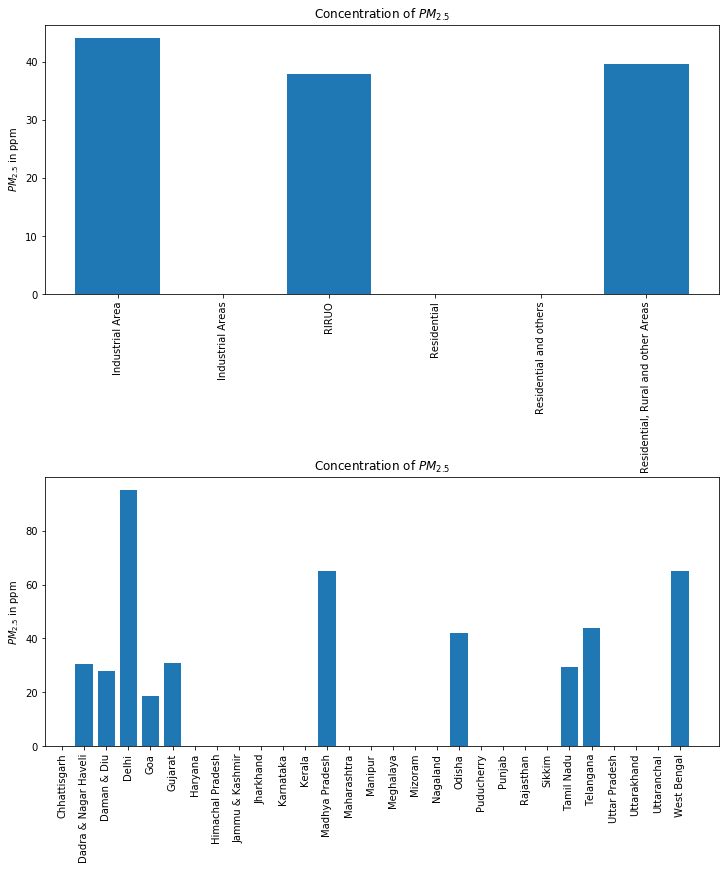

In [6]:
x = data.groupby(['type']).describe()['pm2_5']['mean'].index
x_state = data.groupby(['state']).describe()['pm2_5']['mean'].index

plt.figure(figsize=(10, 12))
plt.subplot(211)
plt.bar(x, data.groupby(['type']).describe()['pm2_5']['mean'])
plt.xticks(rotation='vertical')
plt.ylabel(r'$PM_{2.5}$ in ppm')
plt.title('Concentration of $PM_{2.5}$')

plt.subplot(212)
plt.bar(x_state, data.groupby(['state']).describe()['pm2_5']['mean'])

plt.xticks(rotation='vertical')
plt.ylabel(r'$PM_{2.5}$ in ppm')
plt.tight_layout(pad=0.4, w_pad=0.5)
plt.title('Concentration of $PM_{2.5}$')
plt.show()

From the above plots, we see that the lots of data regarding $PM_{2.5}$ is absent in the dataset. Concentration of $PM_{2.5}$ is highest in same states as that of $NO_2$. As per WHO, concentration of $PM_{2.5}$ should not exceed 25 $\mu$g/m3 24-hour mean. Nearly all of the states mentioned in the above plot exceed the WHO limit. As the value shown in the above plots is a mean value in 2 years, most likely, newest value might be even higher which we'll show during the time series analysis. Frome the bar graph, there is a strong possiblity, that we might find a correlation between concentration of $NO_2$, $SO_2$ and $PM_{2.5}$. 

## Time Series Analysis


In [7]:
# LSort the dataset with dates and then reset the index
data['date'] = pd.to_datetime(data.date) #df['dates'].dt.date

data.sort_values(by='date', inplace=True)
data.reset_index(inplace=True)

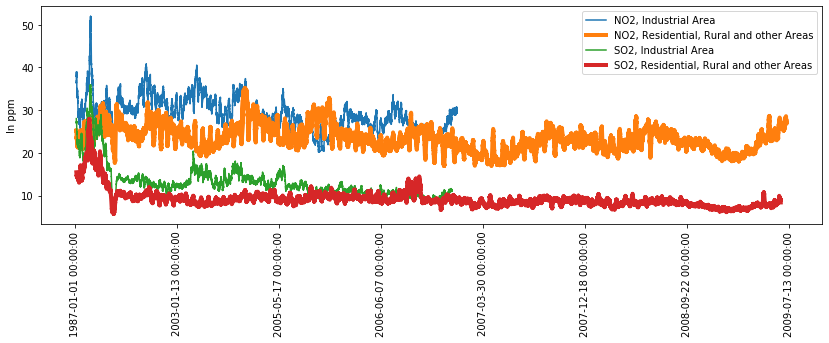

In [8]:
data_no2 = data.dropna(subset=['no2'])
data_so2 = data.dropna(subset=['so2'])
plt.figure(figsize=(14,4))
plt.plot(data_no2.loc[data_no2['type']=='Industrial Area', 'no2'].rolling(365).mean().values, label='NO2, Industrial Area')
plt.plot(data_no2.loc[data_no2['type']=='Residential, Rural and other Areas', 'no2'].rolling(365).mean().values,
                                                                 linewidth=4, label='NO2, Residential, Rural and other Areas')
plt.plot(data_so2.loc[data_so2['type']=='Industrial Area', 'so2'].rolling(365).mean().values, label='SO2, Industrial Area')
plt.plot(data_so2.loc[data_so2['type']=='Residential, Rural and other Areas', 'so2'].rolling(365).mean().values, 
                                                                 linewidth=4, label='SO2, Residential, Rural and other Areas')

plt.ylabel('In ppm')
plt.legend(loc = 'upper right')
plt.xticks([0, 25000, 50000, 75000, 100000, 125000, 150000, 175000], 
               data.loc[np.array([0, 25000, 50000, 75000, 100000, 125000, 150000, 175000]), 'date'], rotation='vertical')
plt.show()

Above plot shows the variation of concentrations of $NO_2$ and $SO_2$ with time. As there are very few data points between year 1987 and 2003, we see the sudden increase in concentration of both $NO_2$ and $SO_2$ and then starts to decrease. With time, concentration of $NO_2$ and $SO_2$ stabilizes, both in Industrial and residential areas.

It'll be interesting to explore states where concentration of $NO_2$ and $SO_2$ is very high. PM 2.5 has not been explored in the above plot as data points are very less and would not be enough to draw a conclusion.

In [9]:
date_indices = data_so2.loc[data_so2['location']=='Delhi', 'date'].index

i = 0
date_list = [93]
for idx in date_indices:
    i += 1
    if i % 1000 == 0:
        date_list.append(idx)
        
date_list.append(435731)        

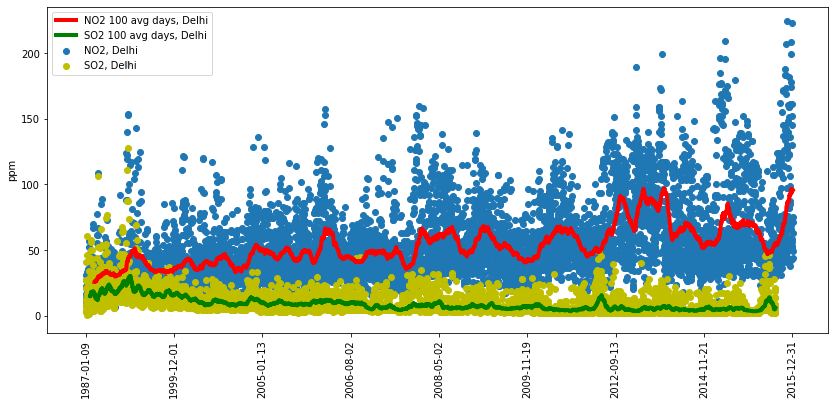

In [22]:
data_no2 = data.dropna(subset=['no2'])
data_so2 = data.dropna(subset=['so2'])

dates_arr = data_no2.loc[date_list, 'date'].values
dates_arr = [str(date) for date in dates_arr]

dates_arr = [date.split("T")[0] for date in dates_arr]

plt.figure(figsize=(14,6))
plt.scatter(list(range(data_no2.loc[data_no2['location']=='Delhi', 'no2'].values.shape[0])) , data_no2.loc[data_no2['location']=='Delhi', 'no2'], label='NO2, Delhi')
plt.plot(data_no2.loc[data_no2['location']=='Delhi', 'no2'].rolling(100).mean().values, linewidth=4, c='r', label='NO2 100 avg days, Delhi')
plt.scatter(list(range(data_so2.loc[data_so2['location']=='Delhi', 'so2'].values.shape[0])), data_so2.loc[data_so2['location']=='Delhi', 'so2'], c='y', label='SO2, Delhi')
plt.plot(data_so2.loc[data_so2['location']=='Delhi', 'so2'].rolling(50).mean().values, linewidth=4, c='g', label='SO2 100 avg days, Delhi')
plt.legend(loc='upper left')
plt.ylabel('ppm')
plt.xticks(list(range(0, 9000, 1000)), dates_arr, rotation=90)
plt.savefig('NO2_SO2_Delhi.png')
plt.show()

Above plot(data for state Delhi) shows the steady rise in the concentration of $NO_2$ while concentration of $SO_2$ remained the same throughout the decade. Maximum values have also risen steadily. It's most likely that the cities where earlier bar plots showed highest concentration, must've risen in the last 28 years. 

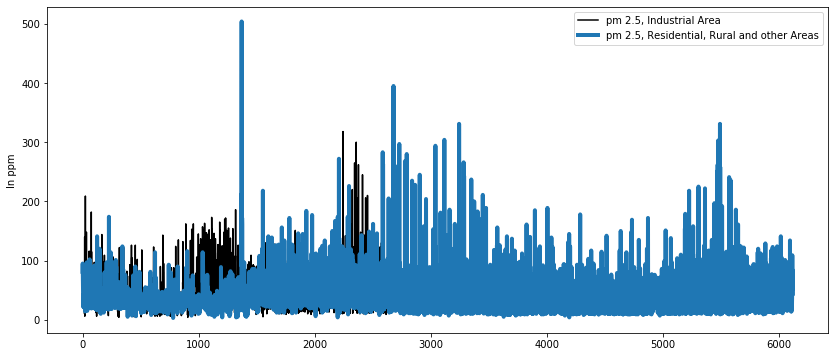

In [11]:
plt.figure(figsize=(14,6))
data_pm25 = data.dropna(subset=['pm2_5'])
plt.plot(data_pm25.loc[data_pm25['type']=='Industrial Area', 'pm2_5'].rolling(1).mean().values, label='pm 2.5, Industrial Area', c='k')
plt.plot(data_pm25.loc[data_pm25['type']=='Residential, Rural and other Areas', 'pm2_5'].rolling(1).mean().values,
                                                                 linewidth=4, label='pm 2.5, Residential, Rural and other Areas')

plt.ylabel('In ppm')
plt.legend(loc = 'upper right')
plt.show()

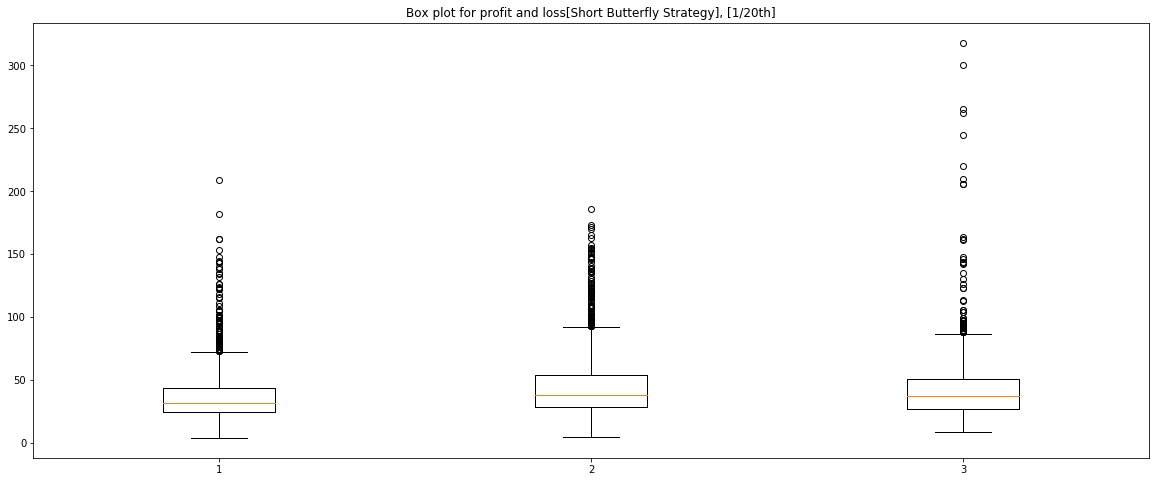

In [34]:
# Lets draw the box plot at every year and see the change in the distribution of the pm 2.5 concentration
data_pm25 = data.dropna(subset=['pm2_5'])
industrial_data_pm2_5 = data_pm25.loc[data_pm25['type']=='Industrial Area', 'pm2_5'].rolling(1).mean().values
residential_data_pm2_5 = data_pm25.loc[data_pm25['type']=='Residential, Rural and other Areas', 'pm2_5'].rolling(1).mean().values

industrial_data_list = []
for year_data in range(0, len(data), 1000):
    temp = industrial_data_pm2_5[year_data:year_data+1000]
    if temp.shape[0]>0:
        industrial_data_list.append(temp)

plt.figure(figsize=(20, 8))
plt.boxplot(industrial_data_list)
    
plt.title("Box plot for profit and loss[Short Butterfly Strategy], [1/20th]")
# plt.savefig("/home/quark3/eclipse-workspace/OPTIONS/BoxPlotPnL.png")
plt.show()

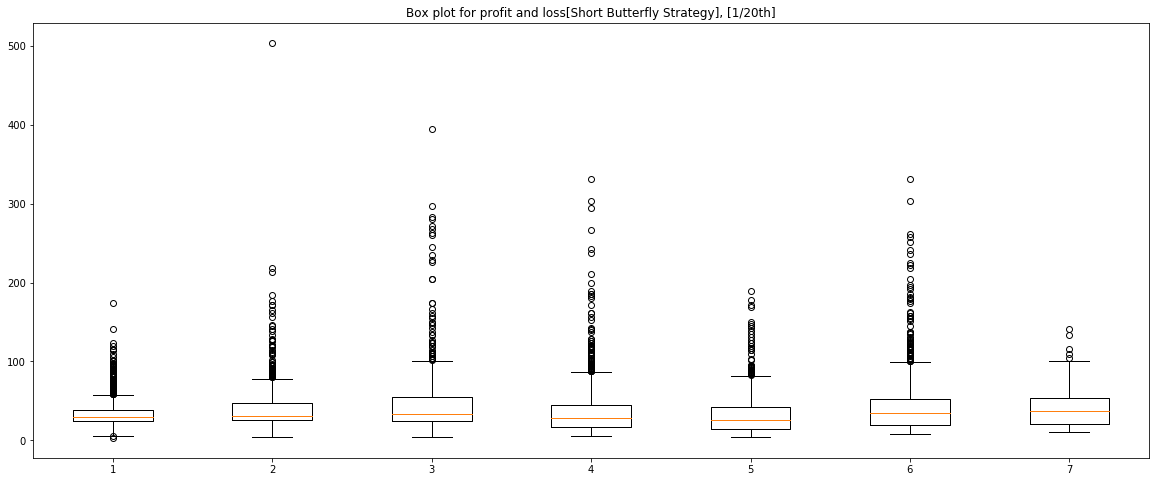

In [36]:
data_pm25 = data.dropna(subset=['pm2_5'])
residential_data_pm2_5 = data_pm25.loc[data_pm25['type']=='Residential, Rural and other Areas', 'pm2_5'].rolling(1).mean().values

residential_data_list = []
for year_data in range(0, len(data), 1000):
    temp = residential_data_pm2_5[year_data:year_data+1000]
    if temp.shape[0]>0:
        residential_data_list.append(temp)

plt.figure(figsize=(20, 8))
plt.boxplot(residential_data_list)
    
plt.title("Box plot for profit and loss[Short Butterfly Strategy], [1/20th]")
# plt.savefig("/home/quark3/eclipse-workspace/OPTIONS/BoxPlotPnL.png")
plt.show()

In [21]:
dates_arr = data_no2.loc[date_list, 'date'].values
dates_arr = [str(date) for date in dates_arr]

dates_arr = [date.split("T")[0] for date in dates_arr]
dates_arr

['1987-01-09',
 '1999-12-01',
 '2005-01-13',
 '2006-08-02',
 '2008-05-02',
 '2009-11-19',
 '2012-09-13',
 '2014-11-21',
 '2015-12-31']

In [35]:
len(industrial_data_list)

3